In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
import numpy as np
from scipy.integrate import simps
import seaborn as sns

from neutrons.data_processor import SpectrumProcessor


spectrum = pd.read_csv('../data/neutron_spectrum.txt',sep=',')
spectrum.columns = ['Energy','Flux']

/tmp/ipykernel_5107/3785585456.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


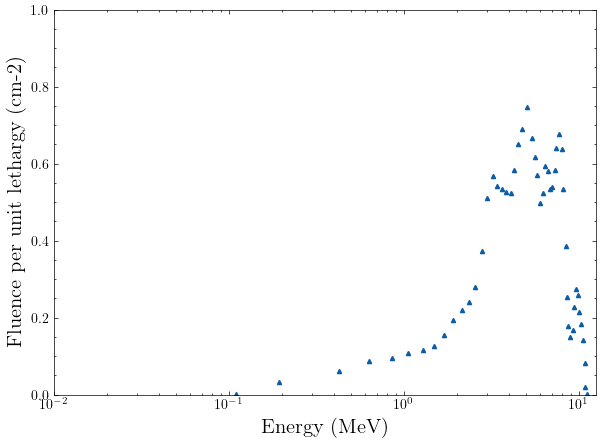

In [2]:
plt.figure(figsize=(7,5))
plt.plot(spectrum['Energy'],spectrum['Flux'], "^", markersize=3)
plt.xscale('log')
plt.ylim(0,1)
plt.xlim(10**-2, 10**1.1)
plt.xlabel('Energy (MeV)', fontsize=15)
plt.ylabel(r"Fluence per unit lethargy (cm-2)", fontsize=15)
plt.show()

In [3]:
# Normalize the spectrum
xp = spectrum["Energy"].values
fp = spectrum["Flux"].values
area_under_curve = simps(fp, xp)
fp_norm = fp/area_under_curve

# Save the normalized spectrum
data = pd.DataFrame({"Energy": xp, "Density": fp_norm})
data.to_csv("../data/neutron_spectrum_normalized.txt", index=False)

/tmp/ipykernel_5107/3675422866.py:4: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area_under_curve = simps(fp, xp)


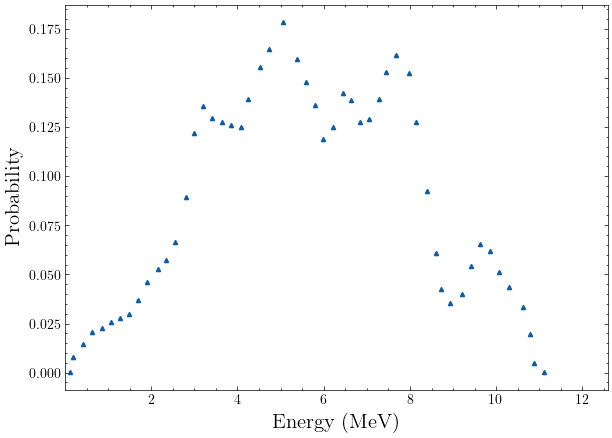

In [4]:
plt.figure(figsize=(7,5))
plt.plot(xp,fp_norm, "^", markersize=3)
plt.xlim(10**-2, 10**1.1)
plt.xlabel('Energy (MeV)', fontsize=15)
plt.ylabel(r"Probability", fontsize=15)
plt.show()

In [6]:



f = spectrum_processor.interpolate(data)

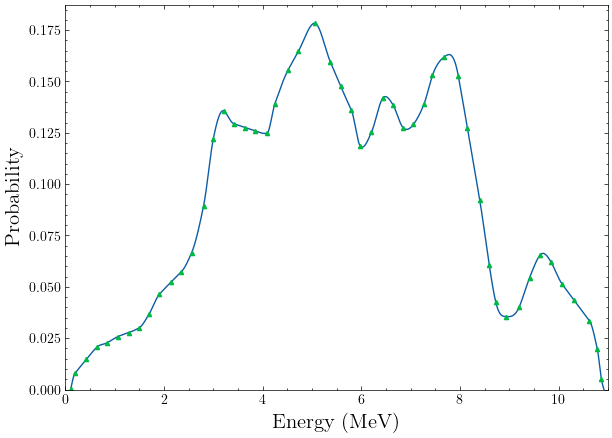

In [7]:
spectrum_processor = SpectrumProcessor(data = data)
x_interp = np.linspace(min(xp), max(xp), 1000000)
y_interp = spectrum_processor.interpolaters[0](x_interp)

plt.figure(figsize=(7,5))
plt.plot(x_interp,y_interp, "-", markersize=3)
plt.plot(xp,fp_norm, "^", markersize=3)
plt.xlabel('Energy (MeV)', fontsize=15)
plt.ylabel(r"Probability", fontsize=15)
plt.xlim(0, 11)
plt.ylim(0)
plt.show()

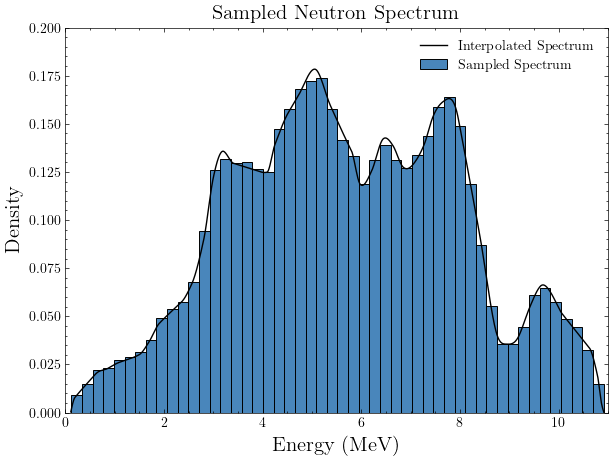

In [7]:
sampled_points = spectrum_processor.sample(100000)

plt.figure(figsize=(7, 5))
plt.plot(x_interp,y_interp, "-", markersize=3, color = "k", label = "Interpolated Spectrum")
sns.histplot(sampled_points, bins=50, stat="density", label = "Sampled Spectrum")
plt.xlabel('Energy (MeV)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xlim(0, 11)
plt.ylim(0, 0.2)
plt.legend()
plt.title("Sampled Neutron Spectrum", fontsize=15)
plt.show()